In [21]:
import os

In [22]:
os.listdir()

['.DS_Store',
 'botNotBot.ipynb',
 'Dataset-README',
 '.ipynb_checkpoints',
 '.git']

In [23]:
pathEn = "/Users/kram/Downloads/botOrNot-en_es/en"

First of all, we will create a procedure to be tested on a single file.

After this first step will be completed, we will extend this procedure to create a complete dataframe

In [24]:
testfile = "/Users/kram/Downloads/botOrNot-en_es/en/1a5b808546838869bc39cebdbad951e3.xml"

In [25]:
import pandas as pd
import xml.etree.ElementTree as ET
import io

def iter_docs(author):
    '''This function extracts the text and the language from the XML'''
    author_attr = author.attrib
    for doc in author.iter('document'):
        doc_dict = author_attr.copy()
        doc_dict.update(doc.attrib)
        doc_dict['data'] = doc.text
        yield doc_dict

xml_data = open(testfile, "r") # Opening the text file
etree = ET.parse(xml_data) # Create an ElementTree object 
df = pd.DataFrame(list(iter_docs(etree.getroot()))) #Append the info to a pandas dataframe

In [26]:
df.head(10)

,data,lang
0,1:7 Wherefore she went after their families: o...,en
1,And he put his hand over the host: and they ga...,en
2,65:18 But be ye far from the Philistines.,en
3,"4:29 And rose up, and went out.",en
4,"24:13 My son, keep my mouth hath spoken, sayin...",en
5,30:21 And afterwards she bare unto him.,en
6,"And on the ground, and took Rebekah, and said ...",en
7,13:10 And I the LORD came unto Elim: and in th...,en
8,And his servants for his issue.,en
9,20:3 And cast him down: deliver my people shal...,en


In [27]:
df['data'][0]

'1:7 Wherefore she went after their families: of Sered, the family of the priests, and the light shine upon thy head; for I fear the LORD.'

In [28]:
# Getting ID to insert in the dataframe

filename = testfile.split("/")[-1].split(".")[0]

In [29]:
filename

'1a5b808546838869bc39cebdbad951e3'

We can now try to extend the procedure to the full directory.

In [30]:
import time

# Creating empty dataframe
dataEn = pd.DataFrame()

# Monitoring time to load the files
start = time.time()

for root, dirs, files in os.walk(pathEn):
    for file in files:
        if file == 'truth.txt':
            continue
        else: 
            try:
                pathToFile = root + '/' + file # Creating path
                # print(pathToFile) # Just for debugging
                xml_data = open(pathToFile, "r", encoding="utf8") # Opening the text file
                etree = ET.parse(xml_data) # Create an ElementTree object
                data = list(iter_docs(etree.getroot())) # Create a list of dictionaries with the data
                filename = file.split(".")[0] # Get filename
                for dictionary in data: # Loop through the dictionary
                    dictionary['ID'] = filename # Append filename
                dataEn = dataEn.append(data)  # Append the list of dictionary to a pandas dataframe
                
            # If the file is not valid, skip it
            except ValueError as e:
                print(e)
                continue
            
end = time.time()
print("Total running time is", end - start)

Total running time is 71.66568803787231


In [31]:
dataEn.head(10)

,ID,data,lang
0,867be96f95dfc4e24541d19c6a5ab8bf,Alex is too nice for love island :(,en
1,867be96f95dfc4e24541d19c6a5ab8bf,RT @STVNews: Teenager charged with rape of wom...,en
2,867be96f95dfc4e24541d19c6a5ab8bf,@LipsTaco @jennyhastie,en
3,867be96f95dfc4e24541d19c6a5ab8bf,@RyanDunbar8 happy bday Ryan have the best day...,en
4,867be96f95dfc4e24541d19c6a5ab8bf,@jennyhastie @bootywhispers I just wanna let j...,en
5,867be96f95dfc4e24541d19c6a5ab8bf,@bootywhispers @jennyhastie what would u do ?,en
6,867be96f95dfc4e24541d19c6a5ab8bf,@Aidsterrr Asking for a mate :/ wee bit line o...,en
7,867be96f95dfc4e24541d19c6a5ab8bf,Wonder what a Sunday without the fear feels like,en
8,867be96f95dfc4e24541d19c6a5ab8bf,RT @liamfrenchx: Brutal getn wee flashbacks a ...,en
9,867be96f95dfc4e24541d19c6a5ab8bf,Went to a&amp;e last night myself after I lock...,en


In [32]:
dataEn['data'][0]

0                  Alex is too nice for love island :(
0    RT @AlexanderRugaev: The Crypto Finance Ecosys...
0    Check out these awesome cooking t-shirts &amp;...
0    YEWWinfo Tiny Nanoparticles to Treat a Huge Pr...
0    Sr. Project Manager Water / Wastewater Enginee...
0                      @lolzdonz @beckyfrancesxo !!!!!
0    @jennycastle96 Ahaha last time acting reckless 😂😂
0    Apr. 20/2002 - The brodway show Jesus Christ S...
0    I'm so excited for the boojum I'm about to get...
0    Killer bonus here 70+ page free download to he...
0                        boooo https://t.co/Q32Ttd9FIH
0    Create a life you love.\n\n#quote #life https:...
0    @puretemerity The archaeology on Arran is amaz...
0    Why Silicon Valley can’t fix itself\n\nhttps:/...
0    @PayChen @designtaxi So you have place to put ...
0    #GameofThrones #ThorosofMyr: There's no story....
0    the amount of pride flags he has around him, a...
0    @mike_mcgrail Pretty sure I seen your doppelga...
0        M

In [33]:
dataEn.describe()

,ID,data,lang
count,412000,412000,412000
unique,4120,373908,1
top,5e336137a35f3cb3ffe2fa38641ca5fa,"wow, it's so sad about MJ :(",en
freq,100,136,412000


Now that we have merged the IDs with the data, we can create another dataframe with the labels and then merge them using the ID as key

In [34]:
pathToLabels = "/Users/kram/Downloads/botOrNot-en_es/en/truth.txt"

In [35]:
target = pd.read_csv(pathToLabels, sep=":::")
target.columns=['ID', 'botOrHuman', 'sex'] 

/Users/kram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [36]:
target.head(10)

,ID,botOrHuman,sex
0,2bed15d46872169dc7deaf8d2b43a56,bot,bot
1,25395a7dbd2caa3d828bb3dbd57d8857,bot,bot
2,1c9f161414334b286c4dc70163744390,bot,bot
3,1da1f87b3dc778f28268eec70ce94f19,bot,bot
4,bd4286bfafb8a35b8e132a396b884e07,bot,bot
5,af61c4c017f246da69285497baf3dc0b,bot,bot
6,7a36090b20e7bddbe55561c52f959041,bot,bot
7,5183ff5bedcab9a6a301ff04e27166cd,bot,bot
8,6ac10734f35a773e9f2209f8668fffdf,bot,bot
9,b5b06752b42d3c354cc8e126f030a864,bot,bot


In [37]:
target.describe()

,ID,botOrHuman,sex
count,4119,4119,4119
unique,4119,2,3
top,cc8247eefb568a278752e144d6a5a83f,human,bot
freq,1,2060,2059


We can now proceed with the concatenation of the dataframes for the English language

In [38]:
mergedEnData = pd.merge(dataEn, target, on='ID')

In [39]:
mergedEnData.head(10)

,ID,data,lang,botOrHuman,sex
0,867be96f95dfc4e24541d19c6a5ab8bf,Alex is too nice for love island :(,en,human,female
1,867be96f95dfc4e24541d19c6a5ab8bf,RT @STVNews: Teenager charged with rape of wom...,en,human,female
2,867be96f95dfc4e24541d19c6a5ab8bf,@LipsTaco @jennyhastie,en,human,female
3,867be96f95dfc4e24541d19c6a5ab8bf,@RyanDunbar8 happy bday Ryan have the best day...,en,human,female
4,867be96f95dfc4e24541d19c6a5ab8bf,@jennyhastie @bootywhispers I just wanna let j...,en,human,female
5,867be96f95dfc4e24541d19c6a5ab8bf,@bootywhispers @jennyhastie what would u do ?,en,human,female
6,867be96f95dfc4e24541d19c6a5ab8bf,@Aidsterrr Asking for a mate :/ wee bit line o...,en,human,female
7,867be96f95dfc4e24541d19c6a5ab8bf,Wonder what a Sunday without the fear feels like,en,human,female
8,867be96f95dfc4e24541d19c6a5ab8bf,RT @liamfrenchx: Brutal getn wee flashbacks a ...,en,human,female
9,867be96f95dfc4e24541d19c6a5ab8bf,Went to a&amp;e last night myself after I lock...,en,human,female


In [30]:
mergedEnData.describe()

,ID,data,lang,botOrHuman,sex
count,411900,411900,411900,411900,411900
unique,4119,373808,1,2,3
top,f791410bc2e3bb3c64b7e43c20098300,"wow, it's so sad about MJ :(",en,human,bot
freq,100,136,411900,206000,205900


# Text EDA

In [53]:
import nltk
from nltk.tokenize import word_tokenize

In [56]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/kram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
df = mergedEnData.data.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(df)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:10]

575560


[':', '@', 'https', '.', ',', '#', 'the', 'to', 'a', 'of']

In [59]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

In [35]:
tokens[0:5]

['Alex', 'nice', 'love', 'island', ':']

In [36]:
!pip install Wordcloud

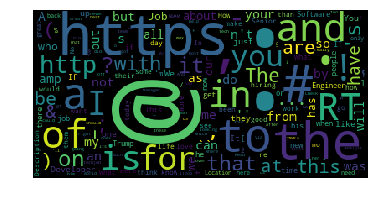

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Machine Learning

In [66]:
mergedEnData.head(10)

,ID,data,lang,botOrHuman,sex
0,867be96f95dfc4e24541d19c6a5ab8bf,Alex is too nice for love island :(,en,human,female
1,867be96f95dfc4e24541d19c6a5ab8bf,RT @STVNews: Teenager charged with rape of wom...,en,human,female
2,867be96f95dfc4e24541d19c6a5ab8bf,@LipsTaco @jennyhastie,en,human,female
3,867be96f95dfc4e24541d19c6a5ab8bf,@RyanDunbar8 happy bday Ryan have the best day...,en,human,female
4,867be96f95dfc4e24541d19c6a5ab8bf,@jennyhastie @bootywhispers I just wanna let j...,en,human,female
5,867be96f95dfc4e24541d19c6a5ab8bf,@bootywhispers @jennyhastie what would u do ?,en,human,female
6,867be96f95dfc4e24541d19c6a5ab8bf,@Aidsterrr Asking for a mate :/ wee bit line o...,en,human,female
7,867be96f95dfc4e24541d19c6a5ab8bf,Wonder what a Sunday without the fear feels like,en,human,female
8,867be96f95dfc4e24541d19c6a5ab8bf,RT @liamfrenchx: Brutal getn wee flashbacks a ...,en,human,female
9,867be96f95dfc4e24541d19c6a5ab8bf,Went to a&amp;e last night myself after I lock...,en,human,female


In [41]:
mergedEnData.describe()

,ID,data,lang,botOrHuman,sex
count,411900,411900,411900,411900,411900
unique,4119,373808,1,2,3
top,99432ec828270e93629793ca8608d91a,"wow, it's so sad about MJ :(",en,human,bot
freq,100,136,411900,206000,205900


In [20]:
X = mergedEnData['data']
y = mergedEnData['sex']

NameError: name 'mergedEnData' is not defined

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(275973, 341004) (135927, 341004)


In [63]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [64]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.7334745856231654


In [65]:
from  sklearn.metrics  import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         bot       0.68      0.99      0.81     67970
      female       0.86      0.50      0.63     34207
        male       0.87      0.46      0.60     33750

   micro avg       0.73      0.73      0.73    135927
   macro avg       0.80      0.65      0.68    135927
weighted avg       0.77      0.73      0.71    135927



# Deep Learning - CNN?

In [128]:
'''Creo la litsa degli ID, delle classi e dei tweets pr ogni ID'''

listaIds =[]
listaClasses = []
matrixTweets = []

for index, x in mergedEnData.iterrows():
    id = x['ID']
    if id not in listaIds:
        newList = list()
        newList.append(x[1])
        matrixTweets.append(newList)
        listaIds.append(id)
        listaClasses.append(x[3])
    else:
        ls = matrixTweets[listaIds.index(id)]
        ls.append(x[1])
        matrixTweets[listaIds.index(id)] = ls
        
print(len(listaIds))

4119


In [41]:
'''Trasformo le entità, lascio le faccine, levo le stopword e se serve agli embeddings lemmatizzo'''

'Trasformo le entità, lascio le faccine, levo le stopword e se serve agli embeddings lemmatizzo'

In [42]:
import sys
!{sys.executable} -m pip install ekphrasis

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
from ekphrasis.dicts.emoticons import emoticons
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer

text_processor = TextPreProcessor (
    # terms that will be normalized
    normalize=[ 'email' , 'percent' , 'money' , 'phone' ,
                'time' , 'url' , 'date' , 'number' ] ,
    fix_html=True ,  # fix HTML tokens
    segmenter="twitter" ,
    corrector="twitter" ,
    unpack_hashtags=True ,  # perform word segmentation on hashtags
    unpack_contractions=True ,  # Unpack contractions (can't -> can not)
    spell_correct_elong=True ,  # spell correction for elongated words
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    dicts=[ emoticons ]
)

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


In [44]:
'''Transform sentences to word embeddings'''

'Transform sentences to word embeddings'

In [45]:
import gensim

In [46]:
google_300 = gensim.models.KeyedVectors.load_word2vec_format( "/Users/kram/Downloads/botOrNot-en_es/google_w2v_300.bin" , binary=True )


In [47]:
'''Trasformo le frasi'''

'Trasformo le frasi'

In [104]:
from nltk.tokenize import TweetTokenizer as TweetTokenizer
from nltk.corpus import stopwords
import random as rn
stop_words = set(stopwords.words('english'))

matrixTweetsEmb = []
for tweetsUser in matrixTweets:
    embTweetsUser = []

    for tweet in tweetsUser:
        embTweetUser = np.zeros([50,300])
        #Preprocesso
        tokList = text_processor.pre_process_doc(tweet)
        #Rimuovo le stopwords
        tokList = [w for w in tokList if not w in stop_words]
        #trovo l'embedding
        numTok = 0;
        for token in tokList[0:50]:
            g_vec =[]
            is_in_model = False
            if token in google_300.vocab.keys ( ):
                is_in_model = True
                g_vec = google_300.word_vec(token)
            elif token == "<number>":
                is_in_model = True
                g_vec = google_300.word_vec( "number")
            elif token == "<percent>":
                is_in_model = True
                g_vec = google_300.word_vec("percent")
            elif token == "<money>":
                is_in_model = True
                g_vec = google_300.word_vec("money")
            elif token == "<email>":
                is_in_model = True
                g_vec = google_300.word_vec("email")
            elif token == "<phone>":
                is_in_model = True
                g_vec = google_300.word_vec("phone")
            elif token == "<time>":
                is_in_model = True
                g_vec = google_300.word_vec("time")
            elif token == "<date>":
                is_in_model = True
                g_vec = google_300.word_vec("date")
            elif token == "<url>":
                is_in_model = True
                g_vec = google_300.word_vec("url")
            elif not is_in_model:
                max = len ( google_300.vocab.keys ( ) ) - 1
                index = rn.randint ( 0 , max )
                word = google_300.index2word[ index ]
                g_vec = google_300.word_vec( word )

            embTweetUser[numTok] = np.array(g_vec)
            numTok += 1
        embTweetsUser.append(np.array(embTweetUser))
        
        
        
    matrixTweetsEmb.append(np.array(embTweetsUser))


In [105]:
'''Num Utenti x Num Tweets x Num MaxTokens x Dim Embedding'''
import numpy as np 
matrixTweetsEmb = np.array(matrixTweetsEmb)
print(matrixTweetsEmb.shape)

(4119, 100, 50, 300)


In [108]:
!{sys.executable} -m pip install joblib
import joblib
joblib.dump(matrixTweetsEmb,'matrixTweetsEmb_4177_100_50_300.dump')

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


['matrixTweetsEmb_4177_100_50_300.dump']

In [125]:
from keras.layers import *
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(200,(5,5), activation ='relu', input_shape=(100,50,300)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(100,(5,4), activation ='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(20,(3,3), activation ='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(400, activation="tanh"))
model.add(Dense(200, activation="tanh"))
model.add(Dense(100, activation="tanh"))
model.add(Dense(2, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 96, 46, 200)       1500200   
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 48, 23, 200)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 44, 20, 100)       400100    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 22, 10, 100)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 20, 8, 20)         18020     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 4, 20)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 800)               0         
__________

In [129]:
!{sys.executable} -m pip install category_encoders
import category_encoders as ce
le =  ce.OneHotEncoder(return_df=False, impute_missing=False, handle_unknown="ignore")
training_classes = le.fit_transform(listaClasses)
print(le.category_mapping)


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
[{'col': 0, 'mapping': [('human', 1), ('bot', 2)]}]


In [ ]:
model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'] )

history = model.fit(matrixTweetsEmb,training_classes,64,1,
                      validation_split= 0.15 ,
                      verbose=1)

Train on 3295 samples, validate on 824 samples
Epoch 1/1
